In [1]:
import string
import numpy as np
import pandas as pd
from pprint import pprint # pretty print

import nltk # nature language tookit
from nltk.corpus import stopwords
# if this is first time you use nltk, please open terminal and type codes bellow 
#   >>> import nltk
#   >>> nltk.download('stopwords')
#   >>> nltk.download('punkt')


# prepare to use in the project
stops = set(stopwords.words('english'))
puns = string.punctuation

# Word2Vec
1. 簡介
    
    Word2Vec其實是Word to Vector的簡稱，意在將每一個字轉換成一條向量，並讓這字的語意透過這條向量描繪出來。早期做自然語言處理時，很難對讓電腦對詞背後的意思有更深一層的理解，因此詞與詞之間的關係很難被挖掘出來，像是相似詞、相反詞、對應詞等，因此Word2Vec在這樣的背景下產生就顯得極其珍貴。
    
    
2. 作用&賣點
    1. 它可以找到相似的字。
    2. 它可以加減，像是Taiwan-Taipei=Germany-Berlin。
    
3. 訓練方法: 參照[這篇網誌](https://goatwang.github.io/2017/06/06/Train-Wiki-Corpus-by-gensim-Word2vec/)

4. 已經訓練好的model:
    1. [Various Models](https://code.google.com/archive/p/word2vec/)
    2. 本課程使用之[GloVe Word2Vec](https://nlp.stanford.edu/projects/glove/)(時間考量已經壓縮過，只留下這個文件中會用到的字)。

5. 專案: 將e-commerce商品標籤分群

# Load Data

In [15]:
with open('all_categories.list', 'r', encoding='utf8') as f:
    all_categories = np.array(eval(f.read()))
print("商品標籤個數:", len(all_categories))
print("前10個商品標籤:", all_categories[:10])


商品標籤個數: 910
前10個商品標籤: ['Small Animal' 'Kitchen' 'Fragrance' 'Track & Sweat Suits' 'Wallet'
 'Favors' 'Quilts' 'Sticker' 'Pets' 'Skirt']


In [16]:
path = "glove.twitter.27B.50d.txt"
with open(path, 'r', encoding='utf8') as f:
    
    line = f.readline()
    tokens = line.split()
    word = tokens[0]
    vec = [float(t) for t in tokens[1:]]
    print(word)
    print(vec)

protection
[-0.26041001081466675, 0.009347000159323215, -1.277899980545044, 0.9399700164794922, 0.13463999330997467, 0.28652000427246094, 0.4756700098514557, -0.5184699892997742, 0.6833699941635132, -0.6862099766731262, 0.25913000106811523, 0.29725000262260437, -2.7242000102996826, 0.3847300112247467, 1.25600004196167, 0.9254199862480164, -0.10192999988794327, 0.1596599966287613, 0.0022934998851269484, -0.3875899910926819, -1.0683000087738037, -0.5366100072860718, 0.006115600001066923, 0.15376000106334686, 0.3549000024795532, 0.5984600186347961, 0.08532900363206863, 0.8782899975776672, 0.21870000660419464, 1.0113999843597412, -0.006921399850398302, -0.51214998960495, -0.27296000719070435, -0.8319799900054932, 0.8566399812698364, -0.5214400291442871, -0.46560999751091003, 0.9842900037765503, -0.6712200045585632, -0.9612900018692017, 0.7888100147247314, -0.6132299900054932, 0.2655099928379059, -0.394569993019104, 0.5829100012779236, -0.5644299983978271, 0.305649995803833, 0.0415770001709

In [21]:
word_vec_mapping = {}
path = "glove.twitter.27B.50d.txt"

# 打開上述檔案，並將每一行中的第一個詞作為key，後面的數字做為向量，加入到word_vec_mapping
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        #=============your works starts===============#
        tokens = line.split()
        token = tokens[0]
        vec = [float(t) for t in tokens[1:]]
        word_vec_mapping[token] = np.array(vec)
        #==============your works ends================#

vec_dimensions = len(word_vec_mapping.get('men'))
print("vec_dimensions:", vec_dimensions)
print("word_vec_mapping length:", len(list(word_vec_mapping.items())))
pprint(list(word_vec_mapping.items())[:5])
# vec_dimensions: 50
# word_vec_mapping length: 947
# [('shoes',
#   array([-0.75313002, -1.78719997,  0.14522   , -0.29681   ,  0.12436   ,
#        -0.40922999,  1.22679996,  0.50806999,  0.27913001,  0.34277001,
#        -0.013902  ,  1.52499998, -3.44880009,  1.05630004, -0.49985   ,

vec_dimensions: 50
word_vec_mapping length: 947
[('protection',
  array([-2.60410011e-01,  9.34700016e-03, -1.27789998e+00,  9.39970016e-01,
        1.34639993e-01,  2.86520004e-01,  4.75670010e-01, -5.18469989e-01,
        6.83369994e-01, -6.86209977e-01,  2.59130001e-01,  2.97250003e-01,
       -2.72420001e+00,  3.84730011e-01,  1.25600004e+00,  9.25419986e-01,
       -1.01930000e-01,  1.59659997e-01,  2.29349989e-03, -3.87589991e-01,
       -1.06830001e+00, -5.36610007e-01,  6.11560000e-03,  1.53760001e-01,
        3.54900002e-01,  5.98460019e-01,  8.53290036e-02,  8.78289998e-01,
        2.18700007e-01,  1.01139998e+00, -6.92139985e-03, -5.12149990e-01,
       -2.72960007e-01, -8.31979990e-01,  8.56639981e-01, -5.21440029e-01,
       -4.65609998e-01,  9.84290004e-01, -6.71220005e-01, -9.61290002e-01,
        7.88810015e-01, -6.13229990e-01,  2.65509993e-01, -3.94569993e-01,
        5.82910001e-01, -5.64429998e-01,  3.05649996e-01,  4.15770002e-02,
        8.36769998e-01, -4.5295000

In [58]:
word_vec_mapping[token]

array([ 0.54964   ,  0.032752  ,  0.19354001, -0.51119   , -0.39482999,
       -0.17643   ,  0.49603   , -0.089685  ,  0.27531001, -1.03320003,
       -0.80488002, -0.57278001, -6.28879976, -0.15977   ,  0.21716   ,
       -0.19869   , -0.27965999, -0.14035   , -0.58644998, -0.75831997,
        0.40090001,  0.35394001, -0.27531999,  0.37569001, -0.34935999,
       -0.28569001,  0.49474999,  0.79527003,  0.84018999,  0.29181001,
        1.00090003,  0.36752   , -0.12441   , -0.22999001,  0.37812001,
        0.2078    ,  0.28736001, -0.16952001, -0.88277   , -0.15059   ,
       -1.83759999,  0.71666002,  0.22428   , -0.35486001,  0.21686999,
       -0.26787001, -0.81520998,  0.21378   ,  0.23067001,  0.20011   ])

# Tokenize & Doc2Vec

In [5]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
puns

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
cat = 'Track & Sweat Suits'
cat.split()
[c.lower() for c in cat.split() if c.lower() not in stops and c not in puns]

['track', 'sweat', 'suits']

In [37]:
# 將每一個句子(商品類別)的詞彙
# 1. 切割開來
# 2. 去掉停用字stops
# 3. 去掉標點符號(string.punctuation)
# 4. 轉小寫

def tokenize(Doc):
    if pd.notnull(Doc):
        # 使用nltk.wordpunct_tokenize將Doc切開
        # 去掉停用字與標點符號，並轉小寫
        #=============your works starts===============#
        tokens = nltk.wordpunct_tokenize(Doc)
        words = [t.lower() for t in tokens if t.lower() not in stops and t not in puns]
        #==============your works ends================#
        return words
    else:
        return None
    
print("before tokenize:", all_categories[0])
print("after tokenize:", tokenize(all_categories[0]))
print("before tokenize:", all_categories[3])
print("after tokenize:", tokenize(all_categories[3]))
# before tokenize: Small Animal
# after tokenize: ['small', 'animal']
# before tokenize: Track & Sweat Suits
# after tokenize: ['track', 'sweat', 'suits']

before tokenize: Small Animal
after tokenize: ['small', 'animal']
before tokenize: Track & Sweat Suits
after tokenize: ['track', 'sweat', 'suits']


In [15]:
test_arr = np.array([
    [1,2,3,4],
    [4,5,6,7],
    [7,8,9,10]
])
# 請將test_arr中的三個array做element-wise的平均
#=============your works starts===============#
test_out = np.mean(test_arr, axis =0)
#==============your works ends================#

print(test_out)
# [4. 5. 6. 7.]

[4. 5. 6. 7.]


In [38]:
doc = 'Track & Sweat Suits'
terms = tokenize(doc)
termvecs = [word_vec_mapping.get(t) for t in terms if t in word_vec_mapping]
np.mean(termvecs, axis = 0)

array([-0.76383998, -0.49650001,  0.23154133, -0.16716999,  0.42855399,
        0.59122999,  1.20600001,  0.29395333,  0.23779666,  0.07520763,
       -0.03580067,  0.62990667, -3.01803327,  0.67778666, -0.269806  ,
        0.09339433, -0.19056867, -0.06502333, -0.58280667, -0.11754466,
       -0.34056634,  0.16771001,  0.76546001, -0.06602533,  0.09606667,
        0.62026433,  0.07627666,  0.61336033, -0.70673   , -0.22618566,
        0.02873534,  0.42897067,  0.08567534,  0.00899   ,  0.56100639,
       -0.47106   , -0.30365003, -0.0323442 ,  0.24442466,  0.27966431,
       -0.00310867, -0.15410333, -0.00819999,  0.10190034, -0.01886333,
       -0.08843   ,  0.46445333,  0.25509333, -0.04841334, -0.13401001])

In [25]:
# word_vec_mapping['track'], word_vec_mapping['sweat'], word_vec_mapping['suits']

In [82]:
def doc2vec(doc, word2vec=word_vec_mapping):
    if pd.notnull(doc):
        # 使用剛剛定義好的tokenize函式tokenize doc，並指派到terms
        # 找出每一個詞彙的代表向量(word_vec_mapping)
        # 並平均(element-wise)所有出現的詞彙向量(注意axis=0)，作為doc的代表向量
        #=============your works starts===============#
        terms = tokenize(doc)
        termvecs = [word_vec_mapping.get(t) for t in terms if t in word_vec_mapping]
        docvec = np.mean(termvecs, axis = 0)
        #==============your works ends================#
    
    if np.sum(np.isnan(docvec)) > 0:
        ## 若找不到對應的詞向量，則給一條全部為零的向量，長度為原詞彙代表向量的長度(vec_dimensions)
        #=============your works starts===============#
        docvec= np.zeros(len(word_vec_mapping['men']))
        #==============your works ends================#
    return docvec

print("before tokenize:", all_categories[3])
print("output shape", doc2vec(all_categories[3]).shape)
print("after tokenize:", doc2vec(all_categories[3])[:5])
print("before tokenize:", all_categories[70])
print("output shape", doc2vec(all_categories[70]).shape)
print("after tokenize:", doc2vec(all_categories[70])[:5])
# before tokenize: Track & Sweat Suits
# output shape (50,)
# after tokenize: [-0.76383996 -0.49650002  0.23154134 -0.16717     0.42855397]
# before tokenize: Teethers
# output shape (50,)
# after tokenize: [0. 0. 0. 0. 0.]

before tokenize: Track & Sweat Suits
output shape (50,)
after tokenize: [-0.76383998 -0.49650001  0.23154133 -0.16716999  0.42855399]
before tokenize: Teethers
output shape (50,)
after tokenize: [0. 0. 0. 0. 0.]


In [76]:
termvecs
np.mean(termvecs, axis = 0)

array([-0.76383998, -0.49650001,  0.23154133, -0.16716999,  0.42855399,
        0.59122999,  1.20600001,  0.29395333,  0.23779666,  0.07520763,
       -0.03580067,  0.62990667, -3.01803327,  0.67778666, -0.269806  ,
        0.09339433, -0.19056867, -0.06502333, -0.58280667, -0.11754466,
       -0.34056634,  0.16771001,  0.76546001, -0.06602533,  0.09606667,
        0.62026433,  0.07627666,  0.61336033, -0.70673   , -0.22618566,
        0.02873534,  0.42897067,  0.08567534,  0.00899   ,  0.56100639,
       -0.47106   , -0.30365003, -0.0323442 ,  0.24442466,  0.27966431,
       -0.00310867, -0.15410333, -0.00819999,  0.10190034, -0.01886333,
       -0.08843   ,  0.46445333,  0.25509333, -0.04841334, -0.13401001])

In [31]:
np.array([doc2vec(c) for c in all_categories])

array([[-0.159852  , -0.32895   , -0.75744002, ...,  0.80292997,
        -0.1045955 , -0.01977003],
       [-0.26927   , -0.20316   ,  0.58113998, ...,  0.40632001,
         0.067672  , -0.047966  ],
       [-1.97619998, -0.79961997,  0.28097999, ..., -0.93962997,
        -0.98263001,  0.14498   ],
       ...,
       [-0.31261   ,  0.20901866, -0.05140001, ..., -0.10012034,
         0.29433898,  0.34536333],
       [-0.69695002, -1.30739999, -0.73149002, ...,  0.27179   ,
         0.49972999, -0.78772002],
       [-0.96344   ,  0.048098  , -0.13559   , ...,  0.35618001,
         0.2455    ,  0.70388001]])

In [32]:
np.array([doc2vec(c) for c in all_categories]).shape

(910, 50)

In [33]:
# 將doc2vec應用到all_categories中的每一個元素上
#=============your works starts===============#
cat_vecs = np.array([doc2vec(c) for c in all_categories])
#==============your works ends================#

print("cat_vecs length:", len(cat_vecs))
print(cat_vecs[3][:5])
print(cat_vecs.shape)
# cat_vecs length: 910
# [-0.76383996 -0.49650002  0.23154134 -0.16717     0.42855397]
# (910, 50)

cat_vecs length: 910
[-0.76383998 -0.49650001  0.23154133 -0.16716999  0.42855399]
(910, 50)


# Clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from collections import Counter
X = cat_vecs
n_clusters= 20

## K means

In [37]:
# 請使用kmeans將商品類別分成20類
#=============your works starts===============#
kmeans = KMeans(n_clusters= n_clusters)
all_categories_labels_kmeans =  kmeans.fit_predict(X)
#==============your works ends================#

for i in range(3):
    print(";;".join(all_categories[all_categories_labels_kmeans==i]))
    print("=============")

Charm;;Beads;;Bracelet;;Handmade;;Vintage & Collectibles;;Bead;;Earrings;;Cabochon;;Jewelry;;Brooch;;Antique;;Necklace;;Necklaces;;Crochet;;Pendant;;Vintage;;Bracelets;;Personalized;;Shawl
Favors;;Teethers;;Playards;;Epilators;;Tweezers;;Afghan;;Tripods & Supports;;Sweatercoat;;Rainwear;;Needlecraft;;Snowsuits & Bibs;;Bedspreads & Coverlets;;Other;;Dehumidifiers;;Motorcycle & Powersports;;Peasant;;Stringed Instruments;;Patriotic;;Nasal Aspirators;;Lithographs, Etchings & Woodcuts;;Clocks;;Draft Stoppers;;Carpenter;;Humidifiers;;Walkers;;Turtleneck, Mock;;Sweeping;;Shrug;;Flare;;Asymmetrical Hem;;Fixture;;Wind & Woodwind Instruments;;Paperweights;;Drums & Percussion;;Bomber;;How to;;Poncho;;Chargers & Cradles;;Papermaking;;other;;Carpenter, Utility;;Raincoat;;Gates & Doorways
Track & Sweat Suits;;Golf Apparel;;Men's Accessories;;Fashion Sneakers;;Blazers & Sport Coats;;Apparel;;Doll Clothing;;Suits & Blazers;;Women's Accessories;;Travel Bathing Kits;;Tank;;Slim, Skinny;;Gear;;Training P

## Hireachy(single link)

In [38]:
# 請使用hierachical(single link)將商品類別分成20類
#=============your works starts===============#
hierachy = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
all_categories_labels_single = hierachy.fit_predict(X)
#==============your works ends================#


for i in range(3):
    print(";;".join(all_categories[all_categories_labels_single==i]))
    print("=============")

Small Animal;;Kitchen;;Fragrance;;Track & Sweat Suits;;Wallet;;Favors;;Quilts;;Sticker;;Pets;;Skirt;;Crewneck;;Athletic Training;;Luggage;;Plate;;Full-Length;;Coffee & Tea Accessories;;Turtleneck;;Eyes;;Dresses;;Motorcycle;;Dusting;;Animals;;Pot Holder;;Calendars;;Shams, Bed Skirts & Bed Frame Draperies;;Photo Albums & Frames;;Plush;;Storage & Organization;;Golf;;Golf Apparel;;Leggings;;Medical Supplies & Equipment;;Books;;Girls;;Historical, Military;;Waxing;;Straight, Pencil;;Men's Accessories;;Knitting Supplies;;Puzzles;;Hair Relaxers;;Vest;;Nail Care;;Hiking & Camping;;Water Sports;;Bike & Skate;;Gloves;;Changing Kits;;Monitors;;Car Electronics & Accessories;;Sweatshirt, Pullover;;Trading Cards;;TV, Audio & Surveillance;;Jeans;;Charm;;Weddings;;GPS Accessories & Mounts;;Toddler;;Pouch;;Exercise;;Pregnancy & Maternity;;Beads;;Face;;Track & Field;;Bubble Bath;;Studio Recording Equipment;;Boxing & MMA;;Feet;;Baskets & Bins;;Teethers;;Lacrosse;;Animal;;Fan Shop;;Fashion Sneakers;;V-Neck

## Hireachy(average link)

In [39]:
# 請使用hierachical(average link)將商品類別分成20類
#=============your works starts===============#
hierachy = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
all_categories_labels_average = hierachy.fit_predict(X)
#==============your works ends================#


for i in range(3):
    print(";;".join(all_categories[all_categories_labels_average==i]))
    print("=============")

Small Animal;;Kitchen;;Track & Sweat Suits;;Wallet;;Favors;;Quilts;;Sticker;;Pets;;Skirt;;Crewneck;;Athletic Training;;Luggage;;Plate;;Full-Length;;Coffee & Tea Accessories;;Turtleneck;;Eyes;;Dresses;;Motorcycle;;Animals;;Pot Holder;;Calendars;;Shams, Bed Skirts & Bed Frame Draperies;;Photo Albums & Frames;;Diapering;;Plush;;Storage & Organization;;Golf;;Golf Apparel;;Leggings;;Medical Supplies & Equipment;;Books;;Girls;;Historical, Military;;Straight, Pencil;;Men's Accessories;;Knitting Supplies;;Puzzles;;Hair Relaxers;;Vest;;Nail Care;;Hiking & Camping;;Water Sports;;Bike & Skate;;Gloves;;Changing Kits;;Monitors;;Car Electronics & Accessories;;Sweatshirt, Pullover;;Trading Cards;;TV, Audio & Surveillance;;Jeans;;Charm;;Weddings;;GPS Accessories & Mounts;;Toddler;;Pouch;;Exercise;;Pregnancy & Maternity;;Beads;;Face;;Track & Field;;Bubble Bath;;Studio Recording Equipment;;Boxing & MMA;;Feet;;Baskets & Bins;;Teethers;;Lacrosse;;Animal;;Fan Shop;;Fashion Sneakers;;V-Neck;;Laptop;;Art Dol

## Hireachy(complete link)

In [40]:
# 請使用hierachical(complete link)將商品類別分成20類
#=============your works starts===============#
hierachy = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
all_categories_labels_complete = hierachy.fit_predict(X)
#==============your works ends================#


for i in range(3):
    print(";;".join(all_categories[all_categories_labels_complete==i]))
    print("=============")

Small Animal;;Track & Sweat Suits;;Wallet;;Favors;;Luggage;;Plate;;Motorcycle;;Plush;;Historical, Military;;Hiking & Camping;;Bike & Skate;;Charm;;Toddler;;Teethers;;Animal;;V-Neck;;Coaster;;Playards;;Ring;;Patch;;Epilators;;Cargo;;Afghan;;Tripods & Supports;;Double Breasted;;Doll Clothing;;Dolls and Miniatures;;Signs;;Yoga & Pilates;;Sweatercoat;;Nursery;;Cage;;Rainwear;;Shampoo Plus Conditioner;;Needlecraft;;Tank;;Bedspreads & Coverlets;;Other;;Slim, Skinny;;Shampoo;;Dehumidifiers;;Change Purse;;Scoop Neck;;Trim;;Motorcycle & Powersports;;Loafers & Slip-Ons;;Swim Trunks;;Collar;;Chain;;Purse;;Halloween;;Track Jacket;;Leg Warmers;;Origami;;Toys;;Outdoors;;Electronics for Kids;;Fishing;;Clutch;;Scale Dollhouse Miniature;;Swim Briefs;;Toy;;Maxi;;Draft Stoppers;;Cuff Links;;Cross Stitch;;Carpenter;;Rings;;Boot Cut;;Cowl Neck;;Tank, Cami;;Novelty & Gag Toys;;Humidifiers;;Walkers;;Skateboard;;Baby & Toddler Toys;;Figurines;;Above Knee, Mini;;Stuffed Animals & Plush;;Costume;;Ballet;;Tray;;

## DBSCAN

In [68]:
# 請使用hierachical(complete link)將商品類別分成20類(eps=0.3)
#=============your works starts===============#
dbscan = DBSCAN(eps=3.1, min_samples= 4)
all_categories_labels_dbscan = dbscan.fit_predict(X)
#==============your works ends================#

for i in [-1, 0]:
    print(";;".join(all_categories[all_categories_labels_dbscan==i]))
    print("=============")

Fragrance;;Favors;;Quilts;;Sticker;;Luggage;;Plate;;Turtleneck;;Eyes;;Motorcycle;;Dusting;;Calendars;;Diapering;;Historical, Military;;Waxing;;Puzzles;;Weddings;;Pouch;;Exercise;;Face;;Laptop;;Magnet;;Felted;;Yarn;;Baguette;;Coaster;;Thermometers;;Teapot;;Humor;;Bakeware;;Lightweight;;Bowl;;Sleep Positioners;;Writing;;Watch;;Cargo;;Toothbrushes;;Camcorders;;Nonfiction;;Geekery;;Tweezers;;Mules & Clogs;;Tiered;;Afghan;;Instructional;;Double Breasted;;Pin;;Advertisement;;Presentation;;Glassware;;Bouquets;;Hooded;;Signs;;Cookbook;;Ceramic;;Yoga & Pilates;;Slipcovers;;Finding;;Cleats;;Cage;;Totes & Shoppers;;Carving;;Cookware;;Lips;;Snowsuits & Bibs;;St Patrick's;;Magazines;;Puzzle;;Ceramics and Pottery;;Conditioners;;Biographies & Memoirs;;Wristlet;;Slim, Skinny;;Mopping;;Televisions;;Panties;;Print;;Religion;;Trench;;Motorcycle & Powersports;;Thanksgiving;;Cabochon;;Air Purifiers;;Patterns;;Mug;;Basket;;Collared;;Lanyard;;Dishes;;Puffer;;Collar;;Jewelry;;Brooch;;Relaxed;;DVD;;Peasant;;Pl

In [67]:
dbscan =DBSCAN(eps=3.1, min_samples= 4)
all_categories_labels_dbscan = dbscan.fit_predict(X)
all_categories_labels_dbscan

array([ 0,  0, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,
       -1,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2, -1,  0,  0, -1, -1,  0,  2, -1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  2, -1,  0,  0,
        0, -1,  0,  0,  0,  0, -1, -1,  0,  3,  5,  1,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  1,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0, -1, -1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
        0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0, -1,  0,  0,  4,  0,  0,  0,  1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0

In [42]:
all_categories_labels_dbscam = DBSCAN().fit_predict(X)
Counter(all_categories_labels_dbscam)
# Counter({-1: 898, 0: 12})

Counter({-1: 896, 0: 14})

In [43]:
df_cat = pd.DataFrame(all_categories_labels_dbscam, index=all_categories, columns=['label'])
print(list(df_cat[df_cat['label'] == 0].index))
# ['Teethers', 'Playards', 'Epilators', 'Sweatercoat', 'Rainwear', 'Needlecraft', 'Bedspreads & Coverlets', 'Dehumidifiers', 'Humidifiers', 'Paperweights', 'Papermaking', 'other']

['Teethers', 'Playards', 'Epilators', 'Sweatercoat', 'Rainwear', 'Needlecraft', 'Bedspreads & Coverlets', 'Other', 'Dehumidifiers', 'Humidifiers', 'Paperweights', 'How to', 'Papermaking', 'other']


# PCA

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def draw_PCA(X, Y, title):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)

    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title(title)
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()

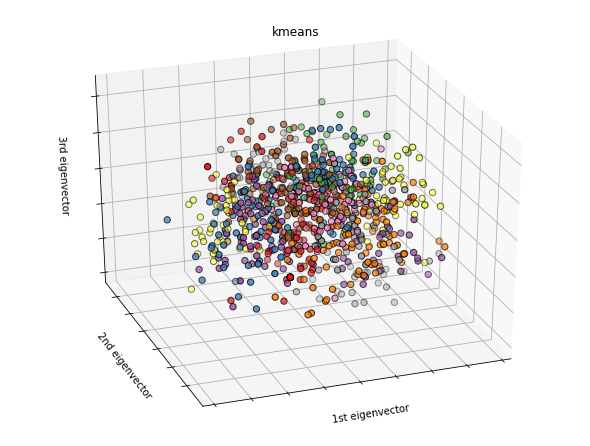

In [45]:
draw_PCA(X, all_categories_labels_kmeans, 'kmeans')

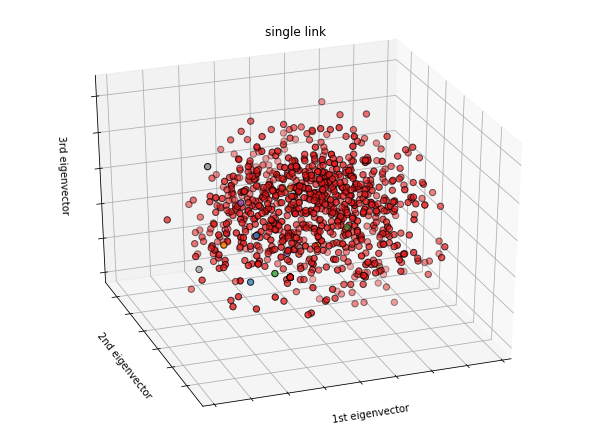

In [46]:
draw_PCA(X, all_categories_labels_single, 'single link')

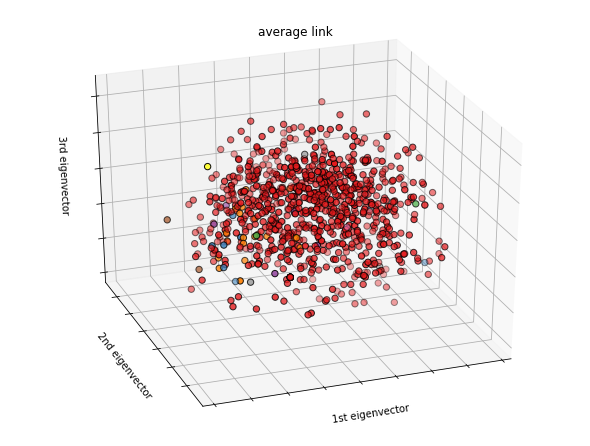

In [48]:
draw_PCA(X, all_categories_labels_average, 'average link')

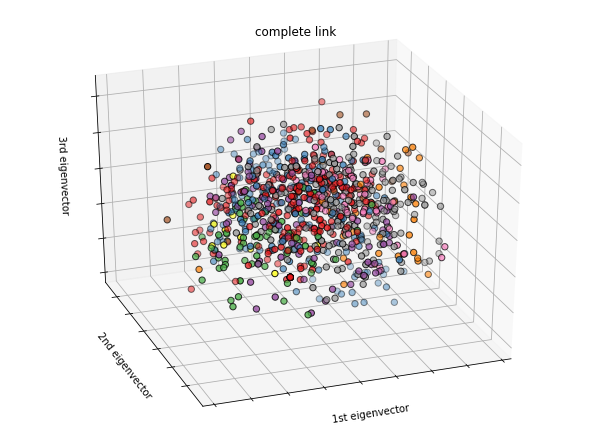

In [49]:
draw_PCA(X, all_categories_labels_complete, 'complete link')

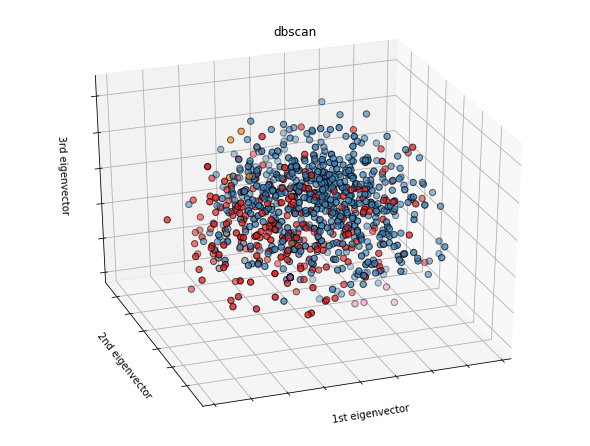

In [69]:
draw_PCA(X, all_categories_labels_dbscan, 'dbscan')

# Evaluation

In [22]:
df_cat = pd.DataFrame(all_categories_labels_kmeans, index=all_categories, columns=['label'])
for i in range(len(set(all_categories_labels_kmeans))):
    cats = list(df_cat[df_cat['label'] == i].index)    
    print("cluster " + str(i) + ": ", ", ".join(list(cats)))
#     print("=============================================")
#     print("=============================================")


cluster 0:  Athletic Training, Golf, Golf Apparel, Track & Field, Boxing & MMA, Lacrosse, Hockey, Badminton, Bowl, Golf Balls, Varsity, Team Sports, Athletic, Volleyball, MLB, Gear, NBA, Games, Game, Basket, Football, Bowling, Pitcher, Tennis & Racquets, Cup, Outdoor Games, Baseball & Softball, Baseball, Sports Bras, Sports & Outdoor Play, Sport, Indoor, Athletic Apparel, Sports & Outdoors, Sports, Women's Golf Clubs, Soccer, NHL, Fantasy, NFL, NCAA, Basketball, Men's Golf Clubs, Polo, Rugby
cluster 1:  Small Animal, Pets, Animals, Toddler, Animal, Art Doll, Kids, Human Figure Doll, Afghan, Doll Clothing, Women, Women's Accessories, Finding, Pet Lover, Bags & Cases, Toys, Electronics for Kids, Children's Books, Kids' Bath, Other Accessories, Children, Baby & Toddler Toys, Stuffed Animals & Plush, Costume, Child Friendly, Women's Handbags, Doll, Kids' Bedding, Doll Clothes, Feeding, Pet Supplies, Dogs
cluster 2:  Girls, Face, Fan Shop, Dress Up & Pretend Play, Sleep Positioners, Watch, 

In [23]:
df_cat = pd.DataFrame(all_categories_labels_single, index=all_categories, columns=['label'])
for i in range(len(set(all_categories_labels_kmeans))):
    cats = list(df_cat[df_cat['label'] == i].index)    
    print("cluster " + str(i) + ": ")
    print(sorted(list(cats)))
    print("=============================================")
    print("=============================================")

cluster 0: 
['Athletic', 'Athletic Apparel', 'Athletic Training', 'Badminton', 'Ballet', 'Band & Orchestra', 'Basket', 'Bass Guitars', 'Bike & Skate', 'Board Shorts', 'Board, Surf', 'Bowling', 'Boxing & MMA', 'Brass Instruments', 'Cargo', 'Casual Pants', 'Casual Shorts', 'Coaster', 'Coasters', 'Cup', 'Drums & Percussion', 'Fishing', 'Formal', 'Gear', 'Golf', 'Golf Apparel', 'Golf Bags', 'Golf Balls', 'Golf Shoes', 'Guitars', 'Hiking & Camping', 'Indoor', 'Instrument', 'Leash', 'Maxi', "Men's Golf Clubs", 'Motorcycle', 'Motorcycle & Powersports', 'Musical instruments', 'Outdoor', 'Outdoor Games', 'Outdoors', 'Polo', 'Polo, Rugby', 'Poncho', 'Skateboard', 'Snowboard', 'Sports & Outdoor Play', 'Sports & Outdoors', 'Stringed Instruments', 'Swim Briefs', 'Swim Trunks', 'Tennis & Racquets', 'Track & Field', 'Training Pants', 'Tweezers', 'Water Sports', 'Wind & Woodwind Instruments', "Women's Golf Clubs", 'Yoga & Pilates']
cluster 1: 
['Afghan', 'Arts & Crafts', 'Bomber', 'Education & Teachin